In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_partregress_grid
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print("Pandas version used: " + pd.__version__)
print("Matplotlib version used: " + plt.matplotlib.__version__)
print("Seaborn version used: " + sns.__version__)
print("Statsmodels version used: " + sm.__version__)
print("Scikit-learn version used: " + sklearn.__version__)

Pandas version used: 1.0.5
Matplotlib version used: 3.2.2
Seaborn version used: 0.10.1
Statsmodels version used: 0.11.1
Scikit-learn version used: 0.23.1


In [2]:
ins_data = pd.read_csv("ins_data_clean.csv")

In [3]:
ins_data.head()

,Unnamed: 0,Unnamed: 0.1,age,bmi,charges,sex_female,smoker_yes
0,0,0,19,27.90,16884.92,1,1
1,1,1,18,33.77,1725.55,0,0
2,2,2,28,33.00,4449.46,0,0
3,3,3,33,22.70,21984.47,0,0
4,4,4,32,28.88,3866.86,0,0


In [4]:
# Let's split the data into training and testing sets. We will do a 70/30 split:
ins_data_train, ins_data_test = train_test_split(ins_data, test_size=0.3)

In [5]:
X = ins_data_train[['age','bmi','sex_female','smoker_yes']]
y = ins_data_train.charges
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst=True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     717.6
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          1.37e-282
Time:                        04:21:34   Log-Likelihood:                -9479.6
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     931   BIC:                         1.899e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.114e+04   1139.041     -9.782      0.0

At first glance, this model does not seem to be too bad. An R-squared of 0.755 demonstrates that the features explain ~75.5% of the variance observed in the training set.

Additionally, the p-value is extremely low for each feature except gender. Based on this information, we could reject the null hypothesis that these features (aside from gender) are not explanatory variables of the target variable, charges.

In [24]:
X_test = ins_data_test[['age','bmi','sex_female','smoker_yes']]
y = ins_data_test.charges
X_test = sm.add_constant(X_test)
res.predict(X_test)

405     14197.513346
417     29732.475975
73      13731.039207
727     27623.326184
612      3616.412876
            ...     
945     14499.079165
793     33569.683941
495      2423.119914
1291    28664.529814
843     37444.950756
Length: 402, dtype: float64

In [26]:
res.predict(X)

1232    10659.817077
1102     8067.357769
684      3275.141486
870     12841.452420
1257    11557.573418
            ...     
1045    32213.722145
881      3052.398688
266     29788.536182
832      3522.774562
762     30083.247121
Length: 936, dtype: float64

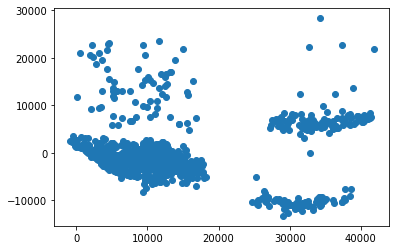

In [27]:
plt.scatter(res.predict(X),res.resid)